<a href="https://colab.research.google.com/github/Martin-William/extra/blob/master/LabO3analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Important Please run

In [18]:
#imports packages for below
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as s


In [19]:
def benford(data):
  return np.log10(1 + 1/data)

def fst_digits(data):
  i = 0 #sets a counter to 0
  d = np.zeros(len(data)) #creates an array the same lenght as pop
  #for the ith value in population converts the value to a string gets the first value of the string and replaces the ith value in d with the first value in the number
  while i<len(data):
    d[i] = int(str(data[i])[0])
    i += 1
  return d

#function to describe the graph shape, x is the array of x data from the file, height is the height of the gausian, mu is the average x positio of the gausian, sigma is the width of the gausian
def lobf(x, height, mu, sigma, bkg):
  return (height*(np.exp((-(x-mu)**2)/(2*(sigma)**2)))+bkg)

#function to describe the graph shape, x is the array of x data from the file, height is the height of the gausian, mu is the average x positio of the gausian, sigma is the width of the gausian
def Bi_Gaus(x, height1, mu1, sigma1, height2, mu2, sigma2, bkg):
  return height1*(np.exp((-(x-mu1)**2)/(2*(sigma1)**2))) + height2*(np.exp((-(x-mu2)**2)/(2*(sigma2)**2))) + bkg

Analysing LED1 Data



Gausians described by: height1*(np.exp((-(x-mu1)**2)/(2*(sigma1)**2))) + height2*(np.exp((-(x-mu2)**2)/(2*(sigma2)**2))) + bkg,
where h1:  0.0912270156290501 +/- 0.0023554705628486975 ,
mu1:  456.26890900328334 +/- 0.30369985407853567 ,
sigma1:  10.193248934436927 +/- 0.3165868017294856 ,
And h2:  0.16780237263586328 +/- 0.0012883295584390096 ,
mu2:  573.079005724425 +/- 0.37149937162663516 ,
sigma2:  50.80293814874829 +/- 0.5268312886123275 ,
bkg = 0 +/- 0


Gausians described by: (h*(np.exp((-(x-mu)**2)/(2*(sigma)**2)))+bkg), 
 For peak 1 
where h:  0.09191606380480159 +/- 0.0038873753557770786 ,
mu:  460.2319210536639 +/- 0.6240869626951216 ,
sigma:  15.42150444391474 +/- 0.899192459718206 ,
bkg = 0 +/- 0
 And peak 2, 
where h:  0.16469314879114427 +/- 0.0014490129652458882 ,
mu:  572.8158767987396 +/- 0.3853298745403113 ,
sigma:  49.47248418151151 +/- 0.5853725806636104 ,
bkg = 0 +/- 0


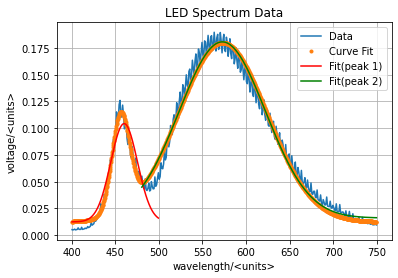

In [20]:
#gets the gile from the net and reads it into an array then seperates into 1D arrays for easy of access 
! wget -q https://raw.githubusercontent.com/Martin-William/extra/master/LED1%202_3_2022.csv
LED_data = pd.read_csv('LED1 2_3_2022.csv',skiprows = 10)

wavelength = LED_data['Wavelength (nm)']
voltage = LED_data['Voltage (V)']

#plots the data
plt.figure(0)
plt.plot(wavelength, voltage, label = 'Data')                


Blobf_vars = [0.120, 460, 10, 0.175, 560, 100, 0] #variables coresponding to height, mu, sigma and backgriund height 
opt_vars, goodfit = s.curve_fit(Bi_Gaus, wavelength, voltage, Blobf_vars) #fits a curve to the data (RaSft, Ref), using the curve generated by lobf with the variables from lobf_vars. refurns the optimal version of the variables in lobf_vars and how well thes fit as two arrays

x_array = np.linspace(min(wavelength),max(wavelength),num=1000) #creates array of x-axis data to generate the curve 
y_array = Bi_Gaus(x_array, *opt_vars) #creats array of y-axis data using the lobf function and the optimal variables returned by curve_fit

#plots the gausian and returns the information about the plot
plt.plot(x_array, y_array, '.', label ='Curve Fit') 
print ('\n\nGausians described by: height1*(np.exp((-(x-mu1)**2)/(2*(sigma1)**2))) + height2*(np.exp((-(x-mu2)**2)/(2*(sigma2)**2))) + bkg,\nwhere h1: ',opt_vars[0], '+/-', np.sqrt(goodfit.diagonal()[0]), ',\nmu1: ', opt_vars[1], '+/-', np.sqrt(goodfit.diagonal()[1]), ',\nsigma1: ', opt_vars[2], '+/-', np.sqrt(goodfit.diagonal()[2]), ',\nAnd h2: ',opt_vars[3], '+/-', np.sqrt(goodfit.diagonal()[3]), ',\nmu2: ', opt_vars[4], '+/-', np.sqrt(goodfit.diagonal()[4]), ',\nsigma2: ', opt_vars[5], '+/-', np.sqrt(goodfit.diagonal()[5]), ',\nbkg = 0 +/- 0') 



peak1w = np.concatenate([wavelength[:100]])
peak1v = np.concatenate([voltage[:100]])

lobf_vars = [0.125, 460, 50, 0] #variables coresponding to height, mu, sigma and backgriund height 
opt_vars, goodfit = s.curve_fit(lobf, peak1w, peak1v, lobf_vars) #fits a curve to the data (RaSft, Ref), using the curve generated by lobf with the variables from lobf_vars. refurns the optimal version of the variables in lobf_vars and how well thes fit as two arrays

x_array = np.linspace(min(peak1w),max(peak1w),num=1000) #creates array of x-axis data to generate the curve 
y_array = lobf(x_array, *opt_vars) #creats array of y-axis data using the lobf function and the optimal variables returned by curve_fit

#plots the gausian and returns the information about the plot
plt.plot(x_array, y_array, 'r', label ='Fit(peak 1)') 
print ('\n\nGausians described by: (h*(np.exp((-(x-mu)**2)/(2*(sigma)**2)))+bkg), \n For peak 1 \nwhere h: ',opt_vars[0], '+/-', np.sqrt(goodfit.diagonal()[0]), ',\nmu: ', opt_vars[1], '+/-', np.sqrt(goodfit.diagonal()[1]), ',\nsigma: ', opt_vars[2], '+/-', np.sqrt(goodfit.diagonal()[2]), ',\nbkg = 0 +/- 0') 



peak2w = np.concatenate([wavelength[80:]])
peak2v = np.concatenate([voltage[80:]])

lobf_vars = [0.175, 560, 100, 0] #variables coresponding to height, mu, sigma and backgriund height 
opt_vars, goodfit = s.curve_fit(lobf, peak2w, peak2v, lobf_vars) #fits a curve to the data (RaSft, Ref), using the curve generated by lobf with the variables from lobf_vars. refurns the optimal version of the variables in lobf_vars and how well thes fit as two arrays

x_array = np.linspace(min(peak2w),max(peak2w),num=1000) #creates array of x-axis data to generate the curve 
y_array = lobf(x_array, *opt_vars) #creats array of y-axis data using the lobf function and the optimal variables returned by curve_fit

#plots the gausian and returns the information about the plot
plt.plot(x_array, y_array, 'g', label ='Fit(peak 2)') 
print (' And peak 2, \nwhere h: ',opt_vars[0], '+/-', np.sqrt(goodfit.diagonal()[0]), ',\nmu: ', opt_vars[1], '+/-', np.sqrt(goodfit.diagonal()[1]), ',\nsigma: ', opt_vars[2], '+/-', np.sqrt(goodfit.diagonal()[2]), ',\nbkg = 0 +/- 0') 


#formatting
plt.xlabel('wavelength/<units>')
plt.ylabel('voltage/<units>')
plt.title('LED Spectrum Data')
plt.grid()
plt.legend(loc = 'upper right')   

Analysing Na1 Data



Gausians described by: height1*(np.exp((-(x-mu1)**2)/(2*(sigma1)**2))) + height2*(np.exp((-(x-mu2)**2)/(2*(sigma2)**2))) + bkg,
where h1:  0.11391670555500849 +/- 0.04507212413069207 ,
mu1:  588.5807770929798 +/- 0.12716384480609247 ,
sigma1:  0.5211045866636437 +/- 0.03325172193836406 ,
And h2:  0.1699340009098592 +/- 0.03750150936838822 ,
mu2:  589.3037314834012 +/- 0.12191181845799512 ,
sigma2:  0.5665287788890374 +/- 0.03553037347996776 ,
bkg = 0 +/- 0


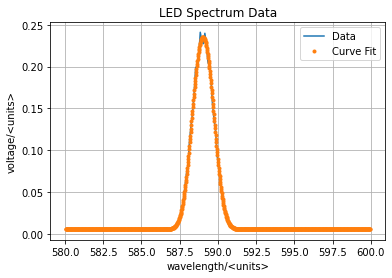

In [21]:
#gets the file from my github and reads it into an array then seperates into 1D arrays for easy of access 
! wget -q https://raw.githubusercontent.com/Martin-William/extra/master/Na1%202_3_2022.csv
Na1_data = pd.read_csv('Na1 2_3_2022.csv',skiprows = 10)

wavelength = Na1_data['Wavelength (nm)']
voltage = Na1_data['Voltage (V)']

#plots the data
plt.figure(0)
plt.plot(wavelength, voltage, label = 'Data')                


Blobf_vars = [0.12, 588.85, 0.7, 0.13, 589.15, 0.7, 0] #variables coresponding to height, mu, sigma and backgriund height 
opt_vars, goodfit = s.curve_fit(Bi_Gaus, wavelength, voltage, Blobf_vars) #fits a curve to the data (RaSft, Ref), using the curve generated by lobf with the variables from lobf_vars. refurns the optimal version of the variables in lobf_vars and how well thes fit as two arrays

x_array = np.linspace(min(wavelength),max(wavelength),num=1000) #creates array of x-axis data to generate the curve 
y_array = Bi_Gaus(x_array, *opt_vars) #creats array of y-axis data using the lobf function and the optimal variables returned by curve_fit

#plots the gausian and returns the information about the plot
plt.plot(x_array, y_array, '.', label ='Curve Fit') 
print ('\n\nGausians described by: height1*(np.exp((-(x-mu1)**2)/(2*(sigma1)**2))) + height2*(np.exp((-(x-mu2)**2)/(2*(sigma2)**2))) + bkg,\nwhere h1: ',opt_vars[0], '+/-', np.sqrt(goodfit.diagonal()[0]), ',\nmu1: ', opt_vars[1], '+/-', np.sqrt(goodfit.diagonal()[1]), ',\nsigma1: ', opt_vars[2], '+/-', np.sqrt(goodfit.diagonal()[2]), ',\nAnd h2: ',opt_vars[3], '+/-', np.sqrt(goodfit.diagonal()[3]), ',\nmu2: ', opt_vars[4], '+/-', np.sqrt(goodfit.diagonal()[4]), ',\nsigma2: ', opt_vars[5], '+/-', np.sqrt(goodfit.diagonal()[5]), ',\nbkg = 0 +/- 0') 



#formatting
plt.xlabel('wavelength/<units>')
plt.ylabel('voltage/<units>')
plt.title('LED Spectrum Data')
plt.grid()
plt.legend(loc = 'upper right') 


Analysing Na1 Data, above voltage 0.2V



Gausians described by: height1*(np.exp((-(x-mu1)**2)/(2*(sigma1)**2))) + height2*(np.exp((-(x-mu2)**2)/(2*(sigma2)**2))) + bkg,
where h1:  -0.04126647516491482 +/- 0.008959343307251426 ,
mu1:  588.6109855126291 +/- 0.030365033132408105 ,
sigma1:  0.10408001871173088 +/- 0.03932411656639011 ,
And h2:  -0.03772702945837142 +/- 0.01039870923442242 ,
mu2:  589.4107363339016 +/- 0.03439600220490239 ,
sigma2:  -0.08565854360757567 +/- 0.04994508300055548 ,
bkg = 0 +/- 0


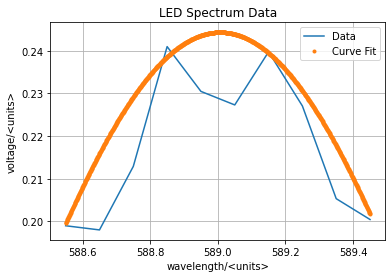

In [22]:
#gets the file from my github and reads it into an array then seperates into 1D arrays for easy of access 
! wget -q https://raw.githubusercontent.com/Martin-William/extra/master/Na1%202_3_2022.csv
Na1_data = pd.read_csv('Na1 2_3_2022.csv',skiprows = 10)

wavelength = Na1_data['Wavelength (nm)']
voltage = Na1_data['Voltage (V)']

wavelength = np.concatenate([wavelength[85:95]])
voltage = np.concatenate([voltage[85:95]])

#plots the data
plt.figure(0)
plt.plot(wavelength, voltage, label = 'Data')                

Blobf_vars = [0.24, 588.85, 1, 0.24, 589.15, 1, 0] #variables coresponding to height, mu, sigma and backgriund height 
opt_vars, goodfit = s.curve_fit(Bi_Gaus, wavelength, voltage, Blobf_vars) #fits a curve to the data (RaSft, Ref), using the curve generated by lobf with the variables from lobf_vars. refurns the optimal version of the variables in lobf_vars and how well thes fit as two arrays

x_array = np.linspace(min(wavelength),max(wavelength),num=1000) #creates array of x-axis data to generate the curve 
#y_array = Bi_Gaus(x_array, *opt_vars) #creats array of y-axis data using the lobf function and the optimal variables returned by curve_fit
y_array = Bi_Gaus(x_array, 0.12, 588.85, 0.7, 0.13, 589.15, 0.7, 0)

#plots the gausian and returns the information about the plot
plt.plot(x_array, y_array, '.', label ='Curve Fit') 
print ('\n\nGausians described by: height1*(np.exp((-(x-mu1)**2)/(2*(sigma1)**2))) + height2*(np.exp((-(x-mu2)**2)/(2*(sigma2)**2))) + bkg,\nwhere h1: ',opt_vars[0], '+/-', np.sqrt(goodfit.diagonal()[0]), ',\nmu1: ', opt_vars[1], '+/-', np.sqrt(goodfit.diagonal()[1]), ',\nsigma1: ', opt_vars[2], '+/-', np.sqrt(goodfit.diagonal()[2]), ',\nAnd h2: ',opt_vars[3], '+/-', np.sqrt(goodfit.diagonal()[3]), ',\nmu2: ', opt_vars[4], '+/-', np.sqrt(goodfit.diagonal()[4]), ',\nsigma2: ', opt_vars[5], '+/-', np.sqrt(goodfit.diagonal()[5]), ',\nbkg = 0 +/- 0') 



#formatting
plt.xlabel('wavelength/<units>')
plt.ylabel('voltage/<units>')
plt.title('LED Spectrum Data')
plt.grid()
plt.legend(loc = 'upper right') 

Ploting all 6 data graphs

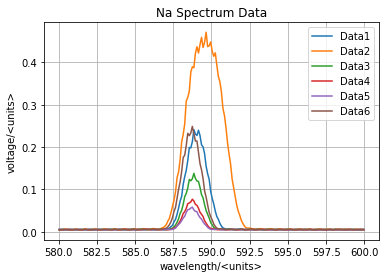

In [23]:
#gets the file from my github and reads it into an array then seperates into 1D arrays for easy of access 
! wget -q https://raw.githubusercontent.com/Martin-William/extra/master/Na1%202_3_2022.csv
Na1_data = pd.read_csv('Na1 2_3_2022.csv',skiprows = 10)
wavelength1 = Na1_data['Wavelength (nm)']
voltage1 = Na1_data['Voltage (V)']
#plots the data
plt.figure(0)
plt.plot(wavelength1, voltage1, label = 'Data1')                

! wget -q https://raw.githubusercontent.com/Martin-William/extra/master/Na2%202_3_2022.csv
Na2_data = pd.read_csv('Na2 2_3_2022.csv',skiprows = 10)
wavelength2 = Na2_data['Wavelength (nm)']
voltage2 = Na2_data['Voltage (V)']
#plots the data
plt.plot(wavelength2, voltage2, label = 'Data2')   

! wget -q https://raw.githubusercontent.com/Martin-William/extra/master/Na3%202_3_2022.csv
Na3_data = pd.read_csv('Na3 2_3_2022.csv',skiprows = 10)
wavelength3 = Na3_data['Wavelength (nm)']
voltage3 = Na3_data['Voltage (V)']
#plots the data
plt.plot(wavelength3, voltage3, label = 'Data3')  

! wget -q https://raw.githubusercontent.com/Martin-William/extra/master/Na4%202_3_2022.csv
Na4_data = pd.read_csv('Na4 2_3_2022.csv',skiprows = 10)
wavelength4 = Na4_data['Wavelength (nm)']
voltage4 = Na4_data['Voltage (V)']
#plots the data
plt.plot(wavelength4, voltage4, label = 'Data4') 

! wget -q https://raw.githubusercontent.com/Martin-William/extra/master/Na5%202_3_2022.csv
Na5_data = pd.read_csv('Na5 2_3_2022.csv',skiprows = 10)
wavelength5 = Na5_data['Wavelength (nm)']
voltage5 = Na5_data['Voltage (V)']
#plots the data
plt.plot(wavelength5, voltage5, label = 'Data5')  

! wget -q https://raw.githubusercontent.com/Martin-William/extra/master/Na6%202_3_2022.csv
Na6_data = pd.read_csv('Na6 2_3_2022.csv',skiprows = 10)
wavelength6 = Na6_data['Wavelength (nm)']
voltage6 = Na6_data['Voltage (V)']
#plots the data
plt.plot(wavelength6, voltage6, label = 'Data6')    

#formatting
plt.xlabel('wavelength/<units>')
plt.ylabel('voltage/<units>')
plt.title('Na Spectrum Data')
plt.grid()
plt.legend(loc = 'upper right') 

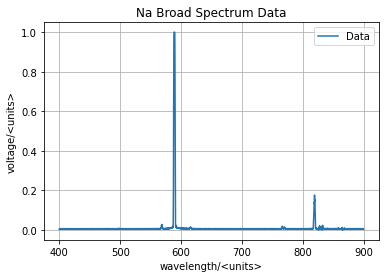

In [24]:
! wget -q https://raw.githubusercontent.com/Martin-William/extra/master/NaBroad%202_3_2022.csv
Na_data = pd.read_csv('NaBroad 2_3_2022.csv',skiprows = 10)
wavelength = Na_data['Wavelength (nm)']
voltage = Na_data['Voltage (V)']
#plots the data
plt.plot(wavelength, voltage, label = 'Data')    

#formatting
plt.xlabel('wavelength/<units>')
plt.ylabel('voltage/<units>')
plt.title('Na Broad Spectrum Data')
plt.grid()
plt.legend(loc = 'upper right') 

#Week2

In [34]:
! wget -q https://raw.githubusercontent.com/Martin-William/extra/master/HgBroad%202_10_2022.csv
Na_data = pd.read_csv('HgBroad 2_10_2022.csv',skiprows = 10)
wavelength = Na_data['Wavelength (nm)']
voltage = Na_data['Voltage (V)']
#plots the data
plt.plot(wavelength, voltage, label = 'Data')    

#formatting
plt.xlabel('wavelength/<units>')
plt.ylabel('voltage/<units>')
plt.title('Na Broad Spectrum Data')
plt.grid()
plt.legend(loc = 'upper right') 

ParserError: ignored

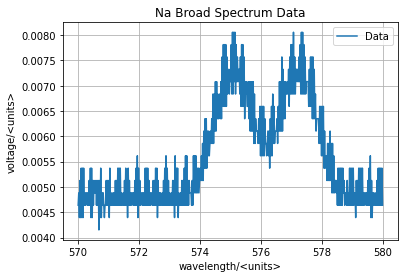

In [33]:
! wget -q https://raw.githubusercontent.com/Martin-William/extra/master/Hm.7mmslit.02step100smp%202_10_2022.csv
Na_data = pd.read_csv('Hm.7mmslit.02step100smp 2_10_2022.csv',skiprows = 10)
wavelength = Na_data['Wavelength (nm)']
voltage = Na_data['Voltage (V)']
#plots the data
plt.plot(wavelength, voltage, label = 'Data')    

#formatting
plt.xlabel('wavelength/<units>')
plt.ylabel('voltage/<units>')
plt.title('Na Broad Spectrum Data')
plt.grid()
plt.legend(loc = 'upper right') 